# Plotting Binary Classificatoin results:

### Load dependencies and data:

In [78]:
import pandas as pd
import numpy as np
import boto3

# Create an S3 client instance
s3 = boto3.client('s3')

# Specify the file and bucket names
bucket_name = 'samtfm'
bow = 'bow_results_S3.csv'
tfidf = 'tfidf_results_S3.csv'
dla1 = 'dla_results_S3(1).csv'
dla2 = 'dla_results_S3(2).csv'
bert = 'binary_bert_results_balanced_S3_total.csv'
roberta1 = 'binary_BIOroBERTa_results_balanced_S3_total.csv'
roberta2 = 'binary_BIOroBERTa_results_balanced_S3_total(2).csv'

for file_name in [bow, tfidf, dla1, dla2, bert, roberta1, roberta2]:
    s3.download_file(bucket_name, file_name, file_name)

# Read csv files as pandas dataframes
bow = pd.read_csv(bow)
tfidf = pd.read_csv(tfidf)
dla1 = pd.read_csv(dla1)
dla2 = pd.read_csv(dla2)
bert = pd.read_csv(bert)
roberta1 = pd.read_csv(roberta1)
roberta2 = pd.read_csv(roberta2)

In [79]:
glove = pd.concat([dla1, dla2], axis = 0)
glove = glove.dropna()
glove = glove[glove['10'] == "glove_100d"]

#### Check data is correctly loaded:

In [80]:
glove.head()

,train_acc,train_rec,train_f1,test_acc,test_rec,test_f1,batch_size,dropout,lr,epochs,10
0,0.971371,0.971272,0.971160,0.907729,0.905028,0.905652,16,0.0,0.001,20,glove_100d
1,0.408130,0.638851,0.498069,0.391498,0.625698,0.481637,16,0.0,0.010,20,glove_100d
2,0.130429,0.361149,0.191645,0.140102,0.374302,0.203888,16,0.0,0.100,20,glove_100d
3,0.946809,0.946648,0.944939,0.865305,0.865922,0.865499,16,0.2,0.001,20,glove_100d
4,0.408130,0.638851,0.498069,0.391498,0.625698,0.481637,16,0.2,0.010,20,glove_100d


#### Manipulate data to obtain desired dataframes:

In [81]:
roberta = pd.concat([roberta1, roberta2], axis = 0)
roberta = roberta.dropna()

In [82]:
dla = pd.concat([glove, bert, roberta], axis = 0)
dla = dla.dropna()

In [83]:
dla.shape

(63, 11)

#### Break down DL-approach dataset into  datasets for every embedding type:

In [85]:
glove = dla[dla['10'] == 'glove_100d']
bert = dla[dla['10'] == 'bert_embeddings_bert_large_uncased_whole_word_masking']
roberta = dla[dla['10'] == 'roberta_embeddings_pmc_med_bio_mlm_roberta_large']

#### Plot mean F1-score for each model (considering all hyperparameter combinations)

In [86]:
model_list = [bow, tfidf, glove, bert, roberta]
model_names = ["BoW", "TF-IDF", "GloVe", "BERT", "BIO-roBERTa"]

In [87]:
mean_test_f1 = [round(np.mean(model.test_f1),3) for model in model_list]

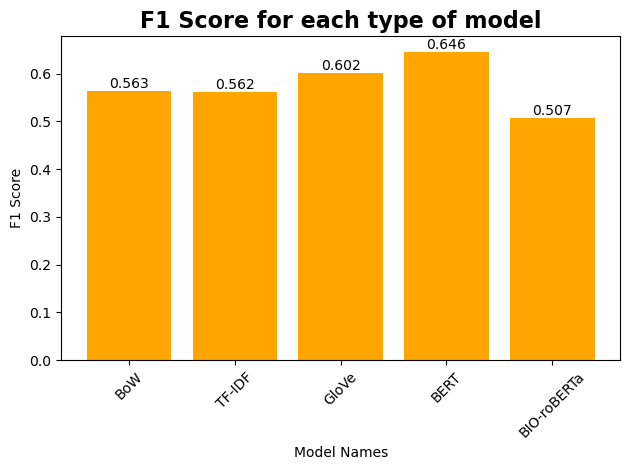

In [88]:
import matplotlib.pyplot as plt
import math

plt.bar(model_names, mean_test_f1, color='orange')
plt.xlabel('Model Names')
plt.ylabel('F1 Score')
plt.title('F1 Score for each type of model', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Add values on top of the bars
for i, value in enumerate(mean_test_f1):
    plt.text(i, value, format(value, ".3f"), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Create df only containing top 5 models of each type:

In [89]:
top10_bow = bow.sort_values(by = ['test_f1'], ascending = False).head(5)

In [90]:
top10_tfidf = tfidf.sort_values(by = ['test_f1'], ascending = False).head(5)

In [91]:
top10_glove = glove.sort_values(by = ['test_f1'], ascending = False).head(5)

In [92]:
top10_bert = bert.sort_values(by = ['test_f1'], ascending = False).head(5)

In [93]:
top10_roberta = roberta.sort_values(by = ['test_f1'], ascending = False).head(5)

#### Plot mean F1-score for top 5 models of each type:

In [95]:
top_model_list = [top10_bow, top10_tfidf, top10_glove, top10_bert, top10_roberta]
model_names = ["BoW", "TF-IDF", "GloVe", "BERT", "BIO-roBERTa"]

In [96]:
mean_top_test_f1 = [round(np.mean(model.test_f1),3) for model in top_model_list]

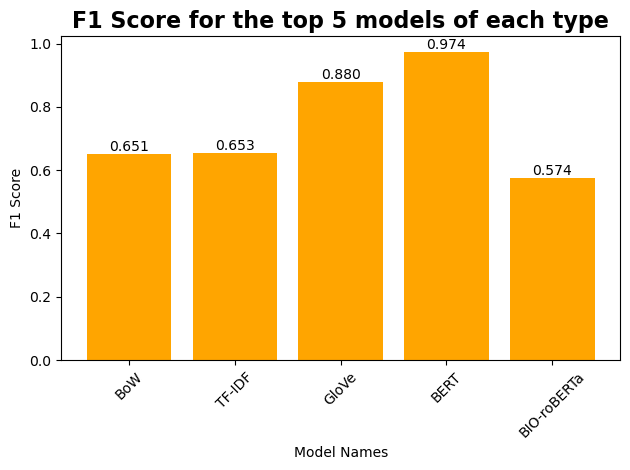

In [97]:
import matplotlib.pyplot as plt
import math

plt.bar(model_names, mean_top_test_f1, color='orange')
plt.xlabel('Model Names')
plt.ylabel('F1 Score')
plt.title('F1 Score for the top 5 models of each type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Add values on top of the bars
for i, value in enumerate(mean_top_test_f1):
    plt.text(i, value, format(value, ".3f"), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Create dataframe with DL-based models with f1-score > 0.85:

In [98]:
top_total_dla

,train_acc,train_rec,train_f1,test_acc,test_rec,test_f1,batch_size,dropout,lr,epochs,10
9,0.989146,0.989056,0.989028,0.978038,0.977654,0.977717,64,0.0,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
3,0.993179,0.993160,0.993151,0.978038,0.977654,0.977717,32,0.2,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
12,0.986395,0.986320,0.986285,0.972871,0.972067,0.972183,64,0.2,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
6,0.986395,0.986320,0.986285,0.972871,0.972067,0.972183,32,0.4,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
15,0.986395,0.986320,0.986285,0.972871,0.972067,0.972183,64,0.4,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
0,0.991829,0.991792,0.991778,0.972213,0.972067,0.972108,32,0.0,0.001,20,bert_embeddings_bert_large_uncased_whole_word_...
3,0.977158,0.976744,0.976610,0.944134,0.944134,0.944134,32,0.2,0.001,20,roberta_embeddings_pmc_med_bio_mlm_roberta_large
0,0.971371,0.971272,0.971160,0.907729,0.905028,0.905652,16,0.0,0.001,20,glove_100d
18,0.968849,0.968536,0.968355,0.887742,0.888268,0.887529,64,0.0,0.001,20,glove_100d
6,0.925644,0.924761,0.923790,0.871941,0.871508,0.871696,16,0.4,0.001,20,glove_100d


In [94]:
top_total_dla = dla.sort_values(by = ['test_f1'], ascending = False).head(16) 

#### Clean format of the resulting dataset:

In [99]:
top_total_dla.columns = ['train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1',
       'batch_size', 'dropout', 'learning_rate', 'epochs', 'embeddings']
top_total_dla = top_total_dla[['embeddings','batch_size', 'dropout', 'learning_rate', 'epochs', 'train_precision', 'train_recall', 'train_f1', 'test_precision', 'test_recall', 'test_f1']]
top_total_dla["embeddings"] =[emb.split("_")[0] for emb in  top_total_dla["embeddings"]]

In [100]:
top_total_dla = top_total_dla.drop(["train_precision", "train_recall", "test_precision", "test_recall"], axis = 1)

In [101]:
top_total_dla.head(10)

,embeddings,batch_size,dropout,learning_rate,epochs,train_f1,test_f1
9,bert,64,0.0,0.001,20,0.989028,0.977717
3,bert,32,0.2,0.001,20,0.993151,0.977717
12,bert,64,0.2,0.001,20,0.986285,0.972183
6,bert,32,0.4,0.001,20,0.986285,0.972183
15,bert,64,0.4,0.001,20,0.986285,0.972183
0,bert,32,0.0,0.001,20,0.991778,0.972108
3,roberta,32,0.2,0.001,20,0.976610,0.944134
0,glove,16,0.0,0.001,20,0.971160,0.905652
18,glove,64,0.0,0.001,20,0.968355,0.887529
6,glove,16,0.4,0.001,20,0.923790,0.871696


#### Plot a pie chart showing the proportion of each embedding type in the top DL-based models

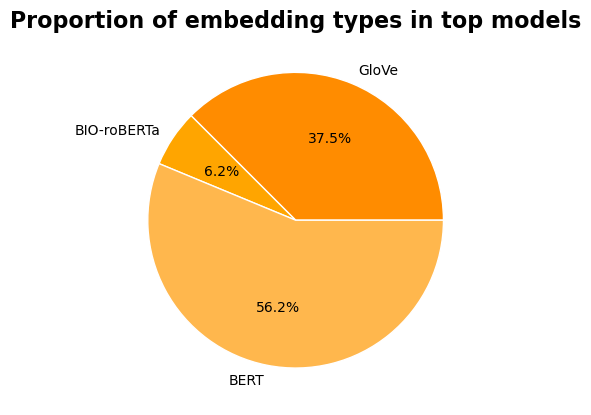

In [102]:
import matplotlib.pyplot as plt

# Value list
lista_clases = top_total_dla["embeddings"]

# Create dictionary to store ocurrences
ocurrencias = {}

# Calculate number of ocurrences of each class
for clase in lista_clases:
    ocurrencias[clase] = ocurrencias.get(clase, 0) + 1

# Obtain classes and ocurrences
clases = list(ocurrencias.keys())
clases = ["GloVe", "BIO-roBERTa", "BERT"]
ocurrencias_clases = list(ocurrencias.values())

# Create orange palette
colores = ['#FF8C00', '#FFA500', '#FFB74D']

# Create and customize pie chart
plt.pie(ocurrencias_clases, labels=clases, autopct='%1.1f%%', colors=colores,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Proportion of embedding types in top models", fontsize=16, fontweight='bold')
plt.show()


#### Get expression in latex for a table showing the best models and their metrics:

In [103]:
# Generate table in LaTeX format
tabla_latex = top_total_dla.head(10).to_latex(index=False)

# Print table
print(tabla_latex)

\begin{tabular}{lrrrrrr}
\toprule
embeddings & batch_size & dropout & learning_rate & epochs & train_f1 & test_f1 \\
\midrule
bert & 64 & 0.000000 & 0.001000 & 20 & 0.989028 & 0.977717 \\
bert & 32 & 0.200000 & 0.001000 & 20 & 0.993151 & 0.977717 \\
bert & 64 & 0.200000 & 0.001000 & 20 & 0.986285 & 0.972183 \\
bert & 32 & 0.400000 & 0.001000 & 20 & 0.986285 & 0.972183 \\
bert & 64 & 0.400000 & 0.001000 & 20 & 0.986285 & 0.972183 \\
bert & 32 & 0.000000 & 0.001000 & 20 & 0.991778 & 0.972108 \\
roberta & 32 & 0.200000 & 0.001000 & 20 & 0.976610 & 0.944134 \\
glove & 16 & 0.000000 & 0.001000 & 20 & 0.971160 & 0.905652 \\
glove & 64 & 0.000000 & 0.001000 & 20 & 0.968355 & 0.887529 \\
glove & 16 & 0.400000 & 0.001000 & 20 & 0.923790 & 0.871696 \\
\bottomrule
\end{tabular}

